### 1. Pengumpulan Data
Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease
Dataset yang dipakai adalah dataset dengan nama file "Hungarian.data" diharapkan sebelum memakai dataset tersebut anda dapat membaca
deskripsi dataset yang ada di dalam file "heart-disease.names"

### 2. Menelaah Data

In [428]:
import pandas as pd 
import re 
import numpy as np
import itertools

#### Load Data

masukkan dataset yang dibutuhkan dengan alamat menyimpan yang tepat dan simpan ke dalam sebuah variable 

In [429]:
dir = 'hungarian.data'

with open(dir, encoding='Latin1') as file: 
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [430]:
data = itertools.takewhile(
  lambda x: len(x) == 76, 
  (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [432]:
df = df.iloc[:, :-1]
df = df.drop(df.columns[0], axis=1)

In [433]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

### 3. Validasi Data

Tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset

In [434]:
df.replace(-9.0, np.nan, inplace=True)

menghitung jumlah nilai null

In [435]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [436]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

### 4. Menentukan Object Data

In [438]:
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]

df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [439]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


###

mengganti nam kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [440]:
column_mapping = {
  2: 'age', 
  3: 'sex',
  8: 'cp', 
  9: 'trestbps',
  11: 'chol',
  15: 'fbs',
  18: 'restecg',
  31: 'thalach',
  37: 'exang',
  39: 'oldpeak',
  40: 'slope',
  43: 'ca',
  50: 'thal',
  57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_4620\2140828327.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [441]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


menghitung jumlah fitur pada dataset

In [442]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

### 5. Membersihkan Data

Melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat

menghitung jumlah null values yang ada didalam dataset

In [443]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Beberapa fitur datanya memiliki nilai null sehingga perlu dilakukan penghapusan fitur menggunakakn fungsi drop

In [444]:
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [445]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Pengisian nilai null menggunakan nilai mean di setiap kolomnya

In [446]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [447]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [448]:
meanTBPS = round(meanTBPS.mean())  
meanChol = round(meanChol.mean())  
meanfbs = round(meanfbs.mean()) 
meanthalach = round(meanthalach.mean()) 
meanexang = round(meanexang.mean()) 
meanRestCG = round(meanRestCG.mean())  

mengubah nilai null mean yang sudah ditentukan sebelumnya

In [449]:
fill_values = {
  'trestbps': meanTBPS,
  'chol': meanChol,
  'fbs': meanfbs,
  'thalach': meanthalach, 
  'exang': meanexang, 
  'restecg': meanRestCG
}
dfClean = df_selected.fillna(value=fill_values)

In [450]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [451]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

melakukan pengecekan terhadap duplikasi data

In [452]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [453]:
print('All Duplicate Rows')
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


menghapus data yang memiliki duplikat

In [454]:
dfClean = dfClean.drop_duplicates()
print('All Duplicate Rows: ')
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [455]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [456]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [457]:
import seaborn as sns
import matplotlib.pyplot as plt

mencari korelasi antar fitur

In [458]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

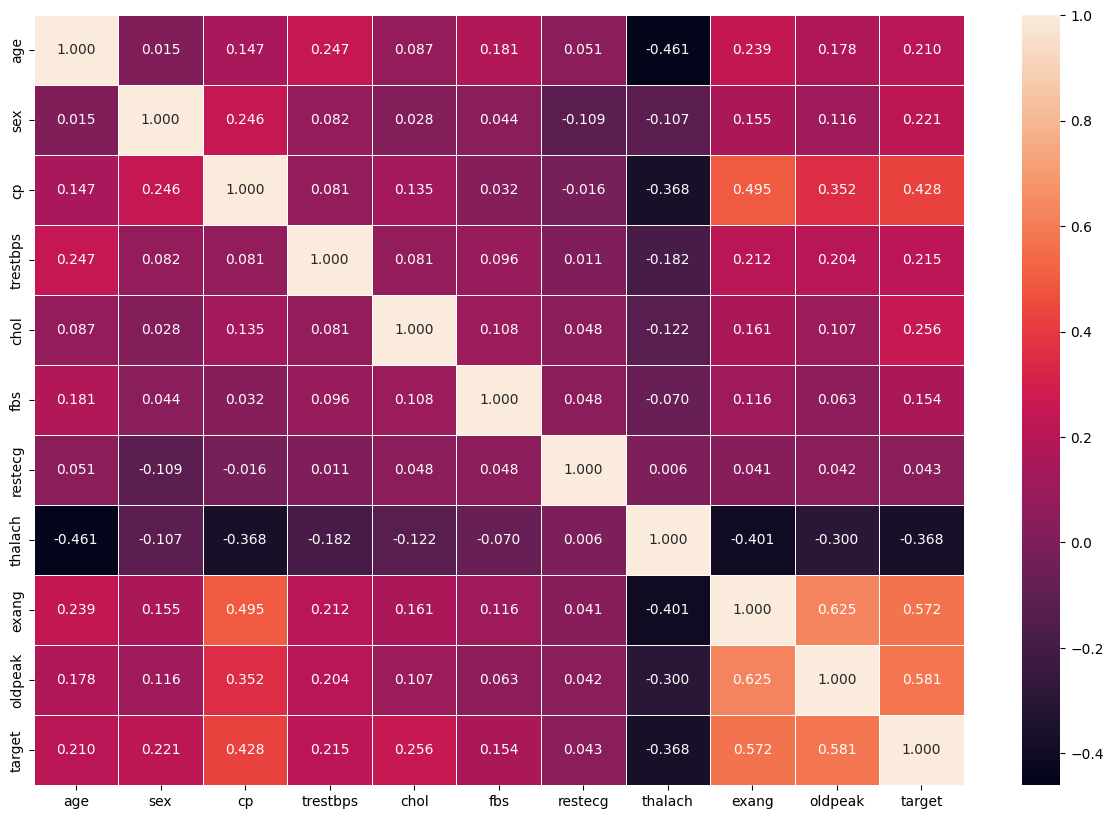

In [459]:
cor_mat = dfClean.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f")

### 6. Konstruksi Data

Tahap konstruksi data salah tujuanya yaitu untuk menyelesaikan semua tipe data yang ada dalam dataset. 

namun, pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali.

In [460]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [461]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


memisahkan antara fitur dan target

In [462]:
x = dfClean.drop('target', axis=1).values
y = dfClean.iloc[:, -1]

melakukan pengecekan terhadap persebaran jumlah target terlebih dahulu.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '4.0')])

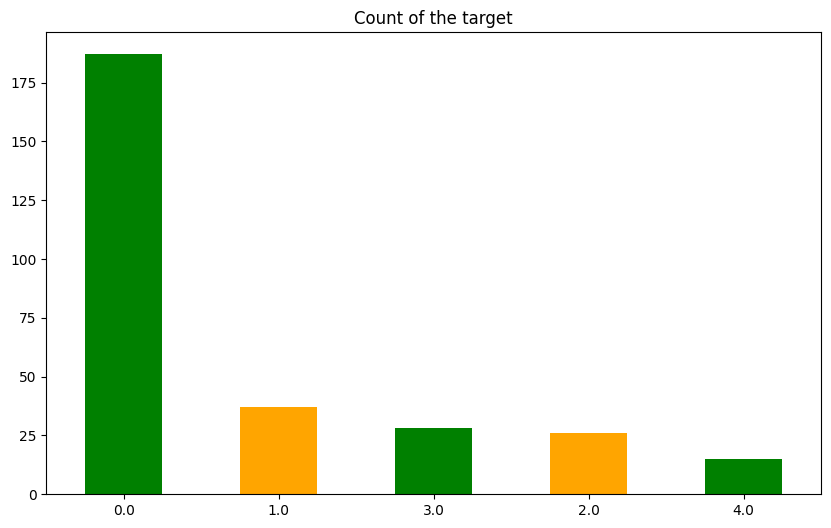

In [463]:
dfClean['target'].value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'orange'])
plt.title("Count of the target")
plt.xticks(rotation=0)

pada grafik diatas menunjukkan bahwa perseberan jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahalu.

menyeimbangkan target ada 2 cara yaitu:
 - oversmapling: dilakukan jika jumlah dataset sedikit
 - undersampling: dilakukan jika jumlah data terlalu banyak

dan disini akan melakukan oversampling dikarenakan jumlah data tidak banyak. 

salah satu metode yang oversampling yang digunakan adalaha SMOTE.

In [464]:
from imblearn.over_sampling import SMOTE

In [465]:
# oversamplinng 
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(x,y)

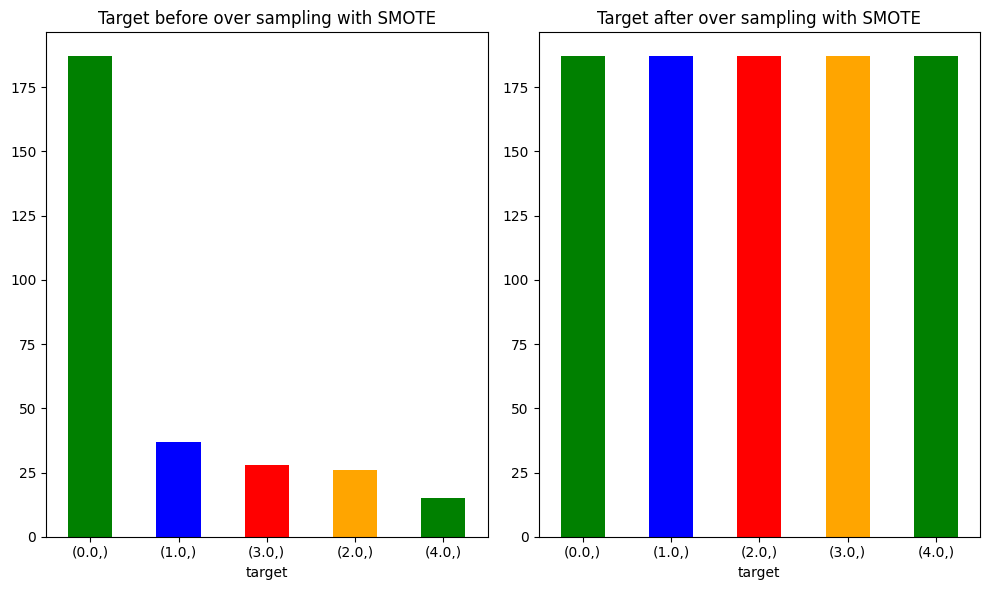

In [466]:
plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'orange'])
plt.title('Target before over sampling with SMOTE')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'orange'])
plt.title('Target after over sampling with SMOTE')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Grafik diatas dapat dilihat ketika target belum di seimbangan dan sudah diseimbangan menggunakan oversampling

In [467]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [468]:
# over 
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

In [469]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Bisa dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar devinisi setiap fitur dataset yang dimiliki. Oleh karena itu, perlu dilakukan normalisasi/standarisasi agar rentang antara standar devisi setiap kolom.

In [470]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)
len(X_smote_resampled_normal)

935

In [471]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


pembagian fitur dan target menjadi data train dan test

In [472]:
from sklearn.model_selection import train_test_split
# membagi fitur dan target menjadi data train dan test (untuk oversampling saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk oversampling + normalisasi)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled)

### 7. Model

In [473]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix, precision_score

def evaluation(Y_test, Y_pred):
  acc = accuracy_score(Y_test, Y_pred)
  rcl = recall_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  ps = precision_score(Y_test, Y_pred, average='weighted')
  
  metric_dict = {
    'accuracy': round(acc, 3),
    'recall': round(rcl, 3),
    'F1 score': round(f1, 3),
    'Precission': round(ps, 3)
  }
  
  return print(metric_dict)

Oversample
<br>
KKN

In [474]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [475]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Hasil akurasi dengan algoritma KKN

In [476]:
y_pred_knn = knn_model.predict(X_test)

In [477]:
# evaluate the KNN model
print("K-Nearest Neighboors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test, y_pred_knn),3)
print("Accuracy: ", accuracy_knn_smote)
print("Classification Report: ")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighboors (KNN) Model:
Accuracy:  0.861
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [478]:
evaluation(y_test, y_pred_knn)
{
  'accuracy': 0.75,
  'recall': 0.754,
  'F1 score': 0.741,
  'Precision score': 0.745
}

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precission': 0.863}


{'accuracy': 0.75,
 'recall': 0.754,
 'F1 score': 0.741,
 'Precision score': 0.745}

menampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnaya

In [479]:
cm = confusion_matrix(y_test, y_pred_knn)

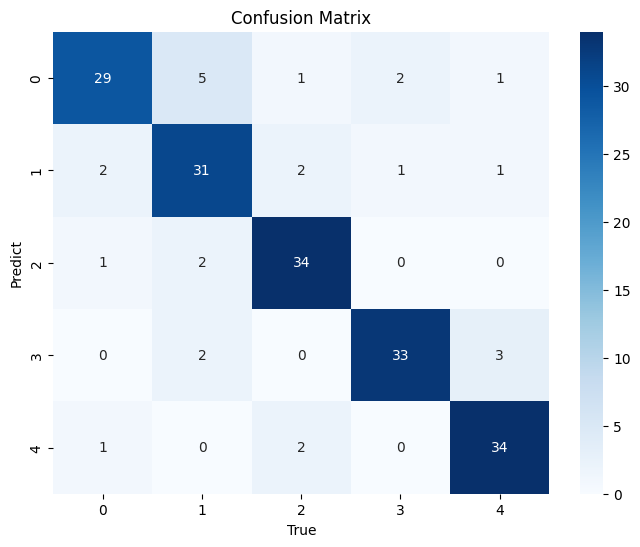

In [480]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Random Forest

In [481]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [482]:
y_pred_rf = rf_model.predict(X_test)

# evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy: ", accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy:  0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [483]:
evaluation(y_test, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precission': 0.922}


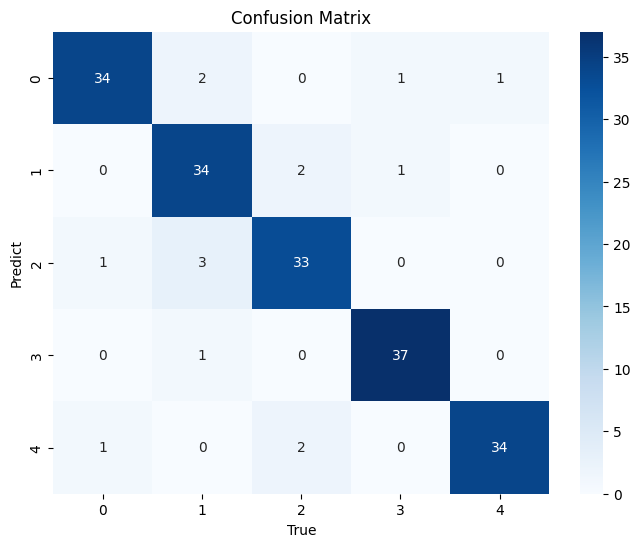

In [484]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

XGBoost

In [485]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [486]:
y_pred_xgb = xgb_model.predict(X_test)

# evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:", accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.882
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.90      0.76      0.82        37
         2.0       0.82      0.86      0.84        37
         3.0       0.90      0.97      0.94        38
         4.0       0.89      0.92      0.91        37

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187



In [487]:
evaluation(y_test, y_pred_xgb)

{'accuracy': 0.882, 'recall': 0.882, 'F1 score': 0.881, 'Precission': 0.883}


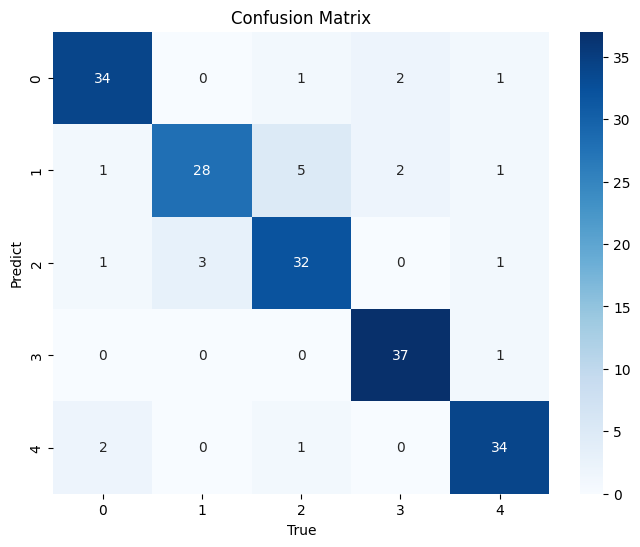

In [488]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Oversample + Normalisasi 

KKN

In [489]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [490]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [491]:
y_pred_knn = knn_model.predict(X_test_normal)

# evaluate the KNN model
print("K-Nearst Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearst Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [492]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precission': 0.863}


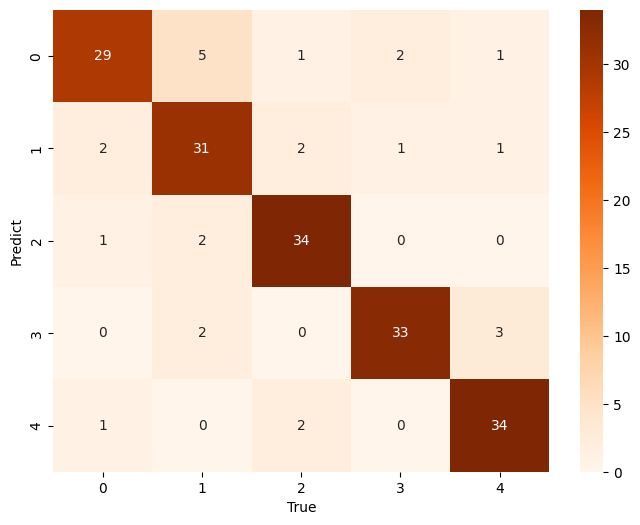

In [493]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel('True')
plt.ylabel("Predict")
plt.show()

Random Forest

In [494]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_normal)

RandomForestClassifier(random_state=42)

In [495]:
y_pred_rf = rf_model.predict(X_test_normal)

# evaluate the Random Forest model:
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [496]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precission': 0.922}


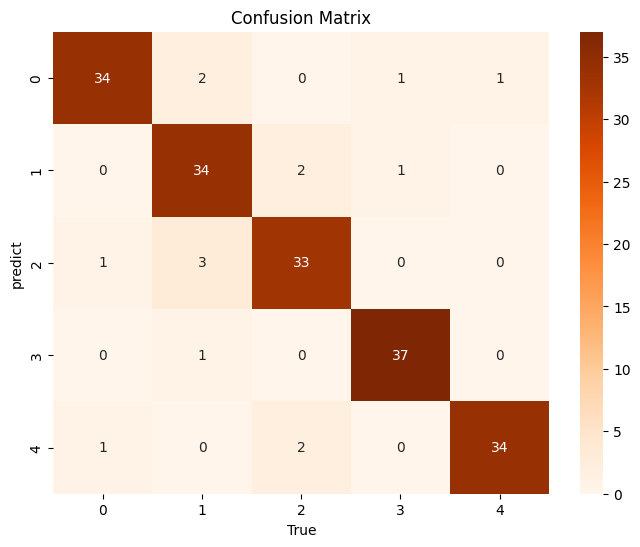

In [497]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("predict")
plt.show()

XGBoost

In [498]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [499]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy:", accuracy_xgb_smote_normal)
print("Classication Report:")
print(classification_report(y_test_normal, y_pred_xgb))



XGBoost Model:
Accuracy: 0.882
Classication Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.90      0.76      0.82        37
         2.0       0.82      0.86      0.84        37
         3.0       0.90      0.97      0.94        38
         4.0       0.89      0.92      0.91        37

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187



In [500]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.882, 'recall': 0.882, 'F1 score': 0.881, 'Precission': 0.883}


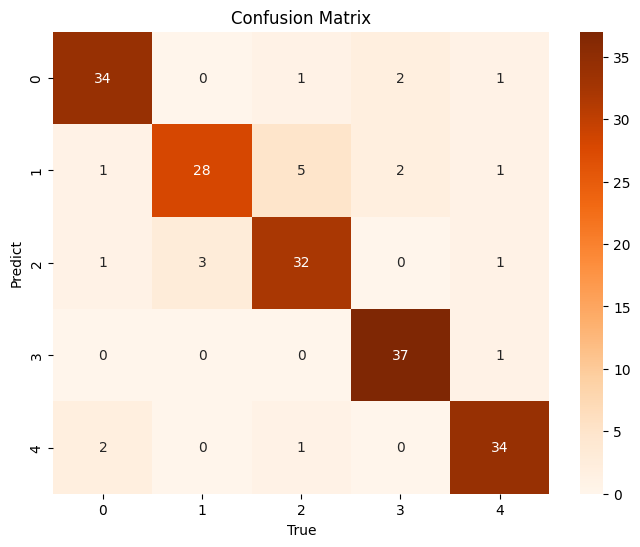

In [501]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

Tunning + Normalization + Oversample

KNN

In [502]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [503]:
knn_model = KNeighborsClassifier()

param_grid = {
  "n_neighbors": range(3, 21),
  "metric": ["euclidean", "manhttan", "chebyshev"],
  "weights": ["uniform", "distance"], 
  "algorithm": ["auto", "ball_tree", "kd_tree"],
  "leaf_size": range(10, 61) 
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'euclidean', 'leaf_size': 54, 'algorithm': 'auto'}


c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
175 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

In [504]:
y_pred_knn = knn_model.predict(X_test_normal)

# evaluate the KNN model
print("K-Nearst Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearst Neighbors (KNN) Model:
Accuracy: 0.877
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85        38
         1.0       0.76      0.78      0.77        37
         2.0       0.85      0.92      0.88        37
         3.0       0.95      0.95      0.95        38
         4.0       0.88      0.97      0.92        37

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187



In [505]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.877, 'recall': 0.877, 'F1 score': 0.876, 'Precission': 0.882}


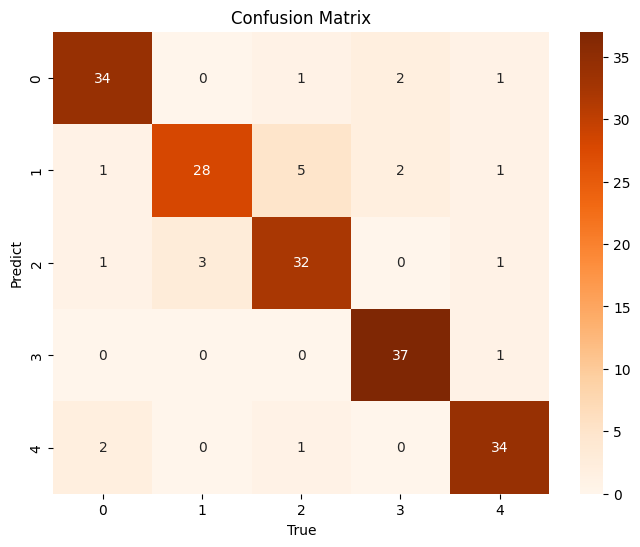

In [506]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

Random Forest

In [507]:
rf_model = RandomForestClassifier()

param_grid = {
  "n_estimators": [100, 200],
  "max_depth": [10, 15],
  "min_samples_leaf": [1, 2],
  "min_samples_split": [2, 5],
  "max_features": ["sqrt", "log2"],
  "random_state": [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [508]:
y_pred_rf = rf_model.predict(X_test_normal)

# evaluate the Random Forest model 
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy:", accuracy_rf_smote_normal_Tun)
print("Classification Report")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.914
Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.87      0.89      0.88        37
         2.0       0.86      0.86      0.86        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [509]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.915, 'Precission': 0.915}


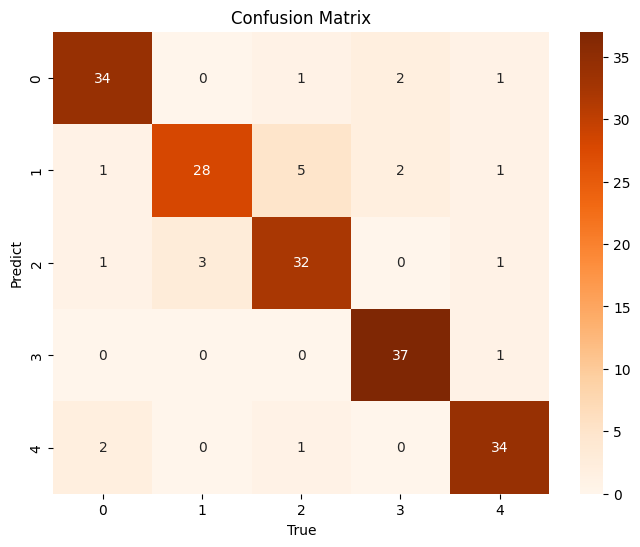

In [510]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

XGBOOST

In [511]:
xgb_model = XGBClassifier()

param_grid = {
  "max_depth": [3, 5, 7],
  "n_learning_rate": [0.01, 0.1],
  "n_estimators": [100, 200],
  "gamma": [0, 0.1], 
  "colsample_bytree": [0.7, 0.8]
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

[09:23:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_learning_rate" } are not used.

Best parameters: {'n_learning_rate': 0.01, 'n_estimators': 200, 'max_depth': 5, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [512]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# evalauate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy:", accuracy_xgb_smote_normal_Tun)
print("Classification Report")
print(classification_report(y_test_normal, y_pred_xgb))


XGBoost Model:
Accuracy: 0.898
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.88      0.81      0.85        37
         2.0       0.86      0.86      0.86        37
         3.0       0.93      0.97      0.95        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [513]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precission': 0.898}


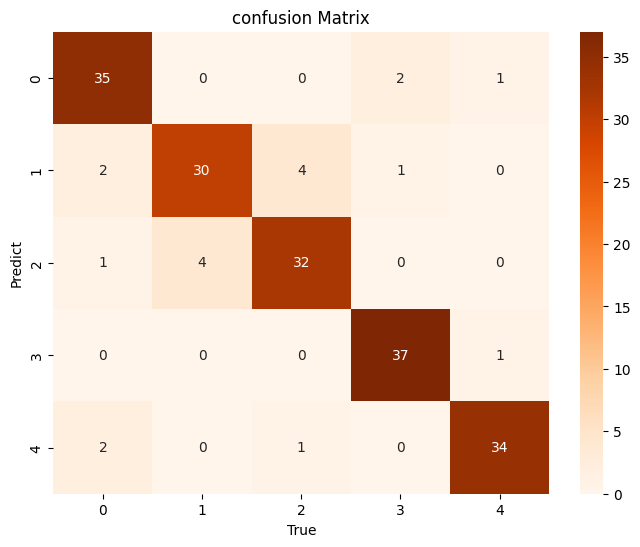

In [514]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("confusion Matrix")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

### 8. Evaluasi

melakukan evaluasi data dan membandingkan antar algoritma dengan tujuan mengetahui jenis model dan algoritma yang menghasilkan akurasi terbaik

In [515]:
import matplotlib.pyplot as plt

In [521]:
model_comp1 = pd.DataFrame({
  'Model': ['K-Nearest Neighbour', 
            'Random Forest', 
            'XGBoost'],
  'Accuracy': [accuracy_knn_smote*100, 
              accuracy_rf_smote*100,
              accuracy_xgb_smote*100]
})

model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,88.2


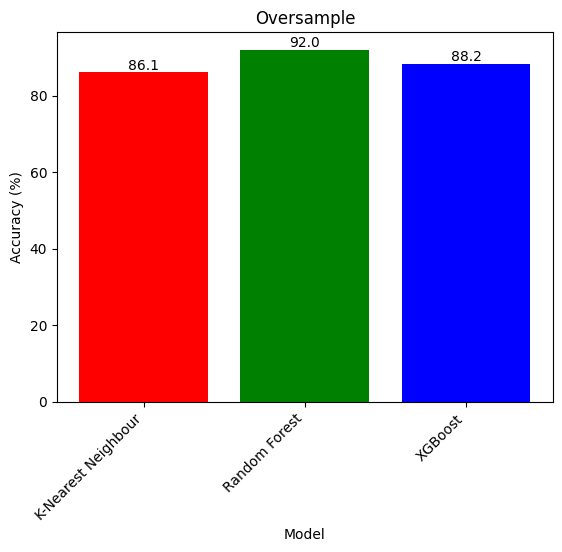

In [524]:
# membuat bar plot
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right')

# menambahkan keterangan jumlah di setiap bar
for bar in bars: 
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# manampilkan bar plot
plt.show()

In [535]:
model_comp2 = pd.DataFrame({
  'Model': ['K-Nearst Neighbour',
            'Random Foresst',
            'XGBoost'],
  'Accuracy': [accuracy_knn_smote_normal*100,
              accuracy_rf_smote_normal*100,
              accuracy_xgb_smote_normal*100]
})

model_comp2.head()

,Model,Accuracy
0,K-Nearst Neighbour,86.1
1,Random Foresst,92.0
2,XGBoost,88.2


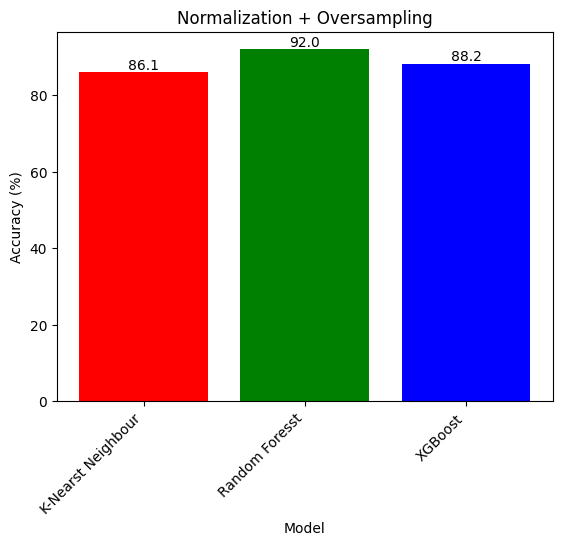

In [536]:
# membuat bar plot
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right')

# menambahkan keterangan jumlah di setiap bar
for bar in bars: 
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# manampilkan bar plot
plt.show()

In [529]:
model_comp3 = pd.DataFrame({
  'Model': ['K-Nearest Neighbour', 
            'Random Forest',
            'XGBoost'],
  'Accuracy': [accuracy_knn_smote_normal_Tun*100, 
              accuracy_rf_smote_normal_Tun*100,
              accuracy_xgb_smote_normal_Tun*100]
})

model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,87.7
1,Random Forest,91.4
2,XGBoost,89.8


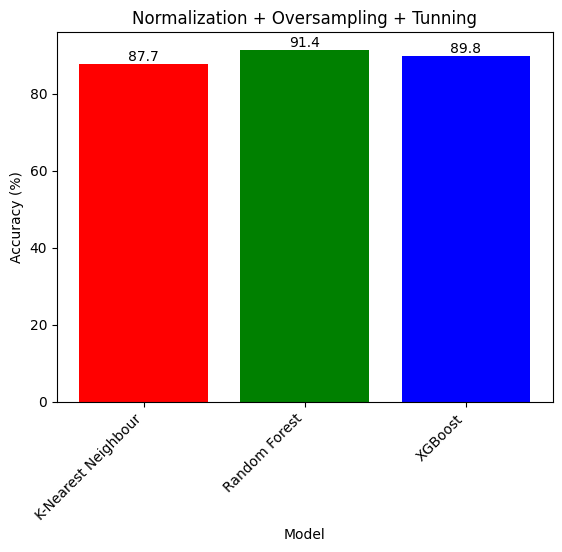

In [531]:
# membuat bar plot
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right')

# menambahkan keterangan jumlah di setiap bar
for bar in bars: 
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# manampilkan bar plot
plt.show()

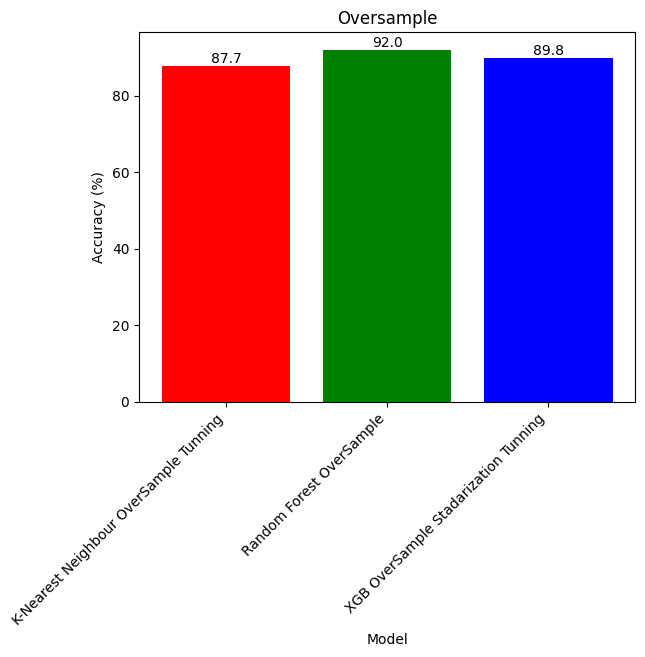

In [533]:
# data frame
model_compBest = pd.DataFrame({
  'Model': ['K-Nearest Neighbour OverSample Tunning',
            'Random Forest OverSample',
            'XGB OverSample Stadarization Tunning'],
  'Accuracy': [accuracy_knn_smote_normal_Tun*100,
              accuracy_rf_smote_normal*100,
              accuracy_xgb_smote_normal_Tun*100]
})

# membuat bar plot
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right')

# menambahkan keterangan jumlah di setiap bar
for bar in bars: 
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# manampilkan bar plot
plt.show()

### 9. Streamlit